# Style Transfer

Trains a network that can transform one image into the style of another.

Use the CPU instead of GPU before loading tensorflow to have access to more memory. Do not run this cell if you want to use your GPU.

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
import numpy as np
np.random.seed(222)
import tensorflow as tf
tf.random.set_seed(222)
from matplotlib import pyplot as plt
%matplotlib inline
import skimage.io as io
import skimage.transform as T

In [3]:
from src.transfer_style import Stylizer, transformColorMode
from src.optimizers import GradientDescent, Adam, L_BFGS
from src.callback import Callback

Show what compute devices are available.
If you want to use the GPU, do not run the first cell that changes CUDA_VISIBLE_DEVICES.

In [4]:
tf.config.list_physical_devices(device_type=None)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
ITERATIONS = 30
resize_dim = (1024, 1024) # resize to save memory for small GPUs
center_crop = (256, 256)  # crop the middle of the image AFTER resizing (changes input/output image size)
color_mode = 'rgb'  # rgb, gray. only rgb works for now

## Input image

Note that this works better with larger images (e.g. 1024px) since the model gets more information on the target style.
Will perform poorly with images smaller than 256px.

(1024, 1024, 3)


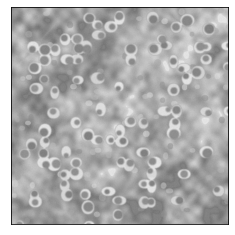

In [6]:
#DEMO
#content = io.imread('img/content/tubingen.jpg')

# TEM GRANULI
#content = io.imread('D:\\DATA\\MIDAS\\procedural_synthetic_TEM_granuli_images\\256px_1024images_prep4nnUnet\\training\\input\\image_1.png')
content = io.imread('D:\\CBMED-GITHUB\\MIDAS_dev\\TEM_synthetic_procedural\\.output\\demo_1024px\\images\\image_3.png')

# ISLET
#content = io.imread('D:\\DATA\\MIDAS\\artistic_style_transfer\\islets\\img3_real.png')
#content = io.imread('D:\\DATA\\MIDAS\\artistic_style_transfer\\islets\\img3_real.png_inference_GEN.png')

content = transformColorMode(content, color_mode)
content = T.resize(content, resize_dim, preserve_range=True).astype('uint8')
content = content[(resize_dim[0]-center_crop[0])//2:(resize_dim[0]-center_crop[0])//2+center_crop[0],
                  (resize_dim[1]-center_crop[1])//2:(resize_dim[1]-center_crop[1])//2+center_crop[1],
                 ...]
print(content.shape)
if color_mode == "gray":
    ax = plt.imshow(content, cmap='Greys_r', vmin=0, vmax=255)
else:
    ax = plt.imshow(content)
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())

## Original reference image

(1024, 1024, 3)


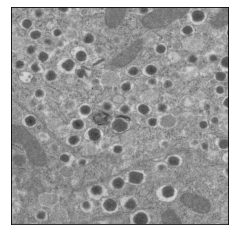

In [7]:
# DEMO
#style = io.imread('img/styles/the-starry-night.jpg')

# TEM GRANULI
#style = io.imread('D:\\DATA\\MIDAS\\procedural_synthetic_TEM_granuli_images\\real_images_256\\image115_7B_insel01_trial02_2500x0014.tif_002.png_1.png')
style = io.imread('D:\\CBMED-GITHUB\\MIDAS_dev\\TEM_synthetic_procedural\\.input\\reference_real_TEM\\image126_7B_insel02_trial03_2500x0000.tif_003.png')

# ISLETS
# style = io.imread('D:\\DATA\\MIDAS\\artistic_style_transfer\\islets\\2021_1186 4085-0228P S99_Scan1_fused.tif_job10522GORDIOS IsletViewer 4085-0228_08092021_c2g.tif_isletID_5_RAWRGB.png')

style = transformColorMode(style, color_mode)
style = T.resize(style, resize_dim, preserve_range=True).astype('uint8')
style = style[(resize_dim[0]-center_crop[0])//2:(resize_dim[0]-center_crop[0])//2+center_crop[0],
              (resize_dim[1]-center_crop[1])//2:(resize_dim[1]-center_crop[1])//2+center_crop[1],
              ...]
print(style.shape)
if color_mode == "gray":
    ax = plt.imshow(style, cmap='Greys_r', vmin=0, vmax=255)
else:
    ax = plt.imshow(style)
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())

## Style transfer

Original style_weight=1e4 may be too large and modify the structure of the input image too much.
Use smaller values to retain integrity of original image.

In [ ]:
output = Stylizer(content_weight=1, style_weight=1e4)(
    content=content,
    style=style,
    optimize=L_BFGS(max_evaluations=20),
    iterations=ITERATIONS,
    callback=Callback('build/style-transfer/realTEM')
)
io.imsave('img/style-transfer/realTEM.jpg', output)

 

  0%|          | 0/30 [00:00<?, ?it/s]